In [1]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#load the ML libraries
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Loading data.
df = pd.read_csv('CC_GENERAL.csv', sep=',', encoding="ISO-8859-1")

# Showing head - first five records.
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
# Showning infos about features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
# Showing some statistics about numerical features.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# Locate missing values.
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

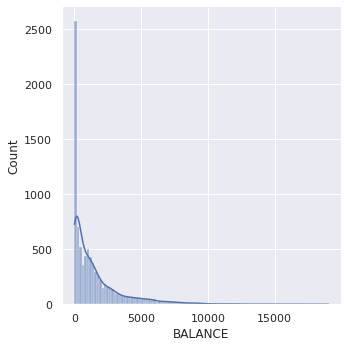

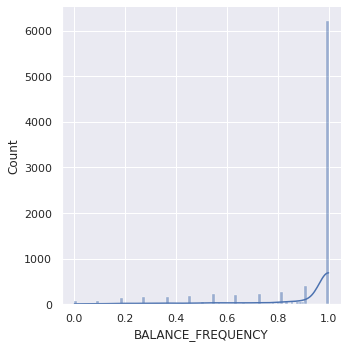

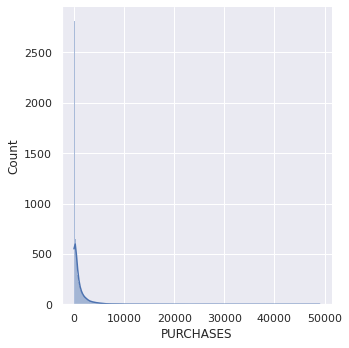

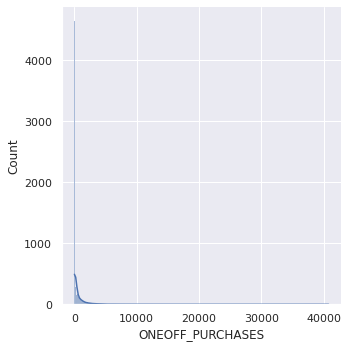

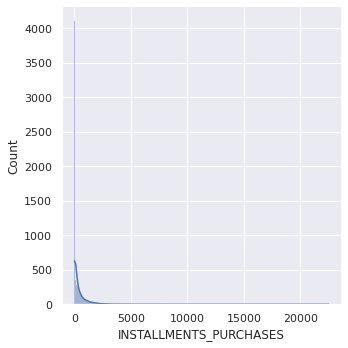

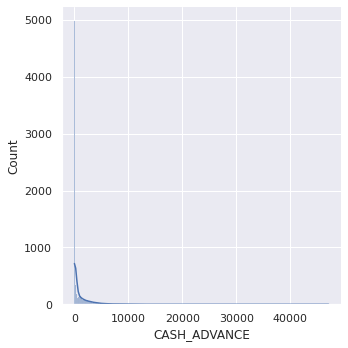

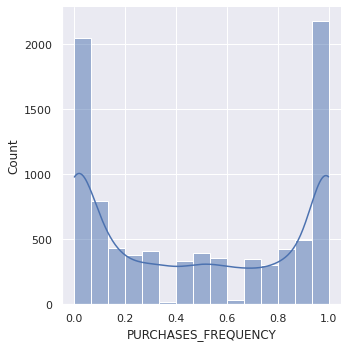

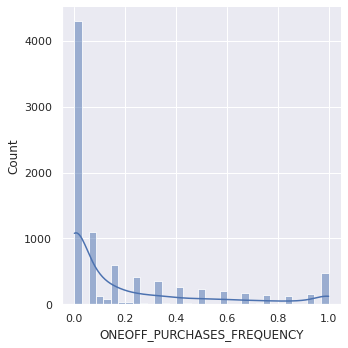

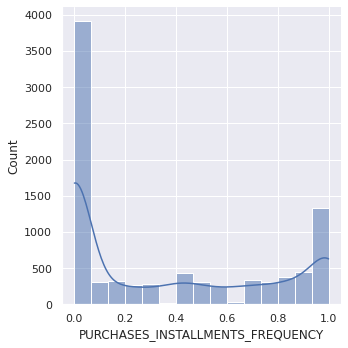

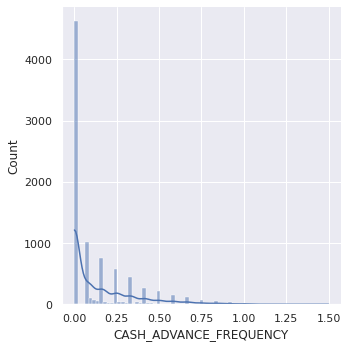

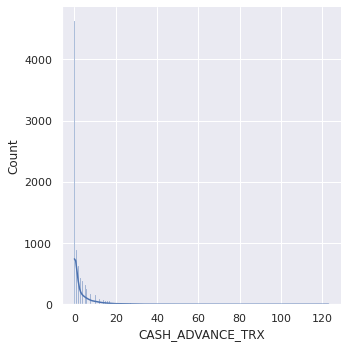

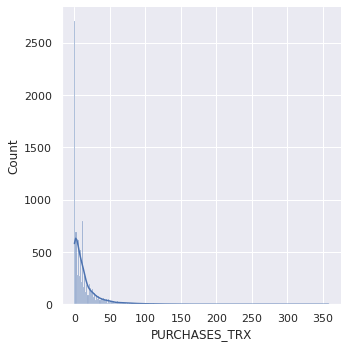

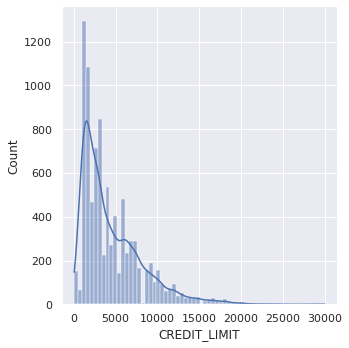

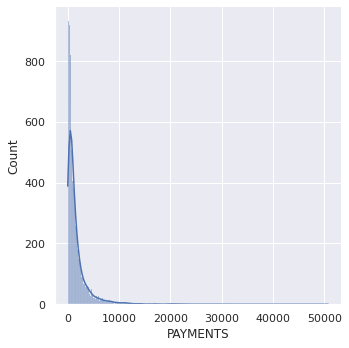

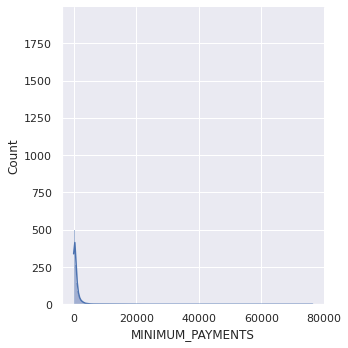

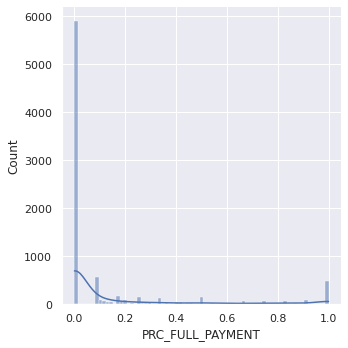

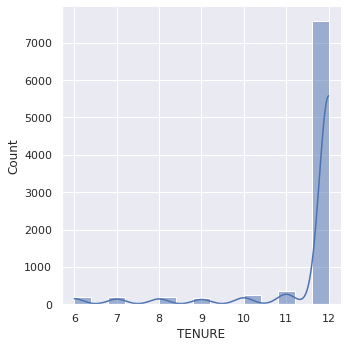

In [5]:
# Cleaning data - Preprocess missing values.
prepro_df = df.copy()
prepro_df = prepro_df.drop(['CUST_ID'], axis=1)
prepro_df['CREDIT_LIMIT'].fillna(prepro_df['CREDIT_LIMIT'].mean(), inplace=True) 
prepro_df['MINIMUM_PAYMENTS'].fillna(prepro_df['MINIMUM_PAYMENTS'].mean(), inplace=True) 

# Plotting histograms.

for col in prepro_df.columns:
    sns.displot(prepro_df, x=col, kde=True)

<AxesSubplot:>

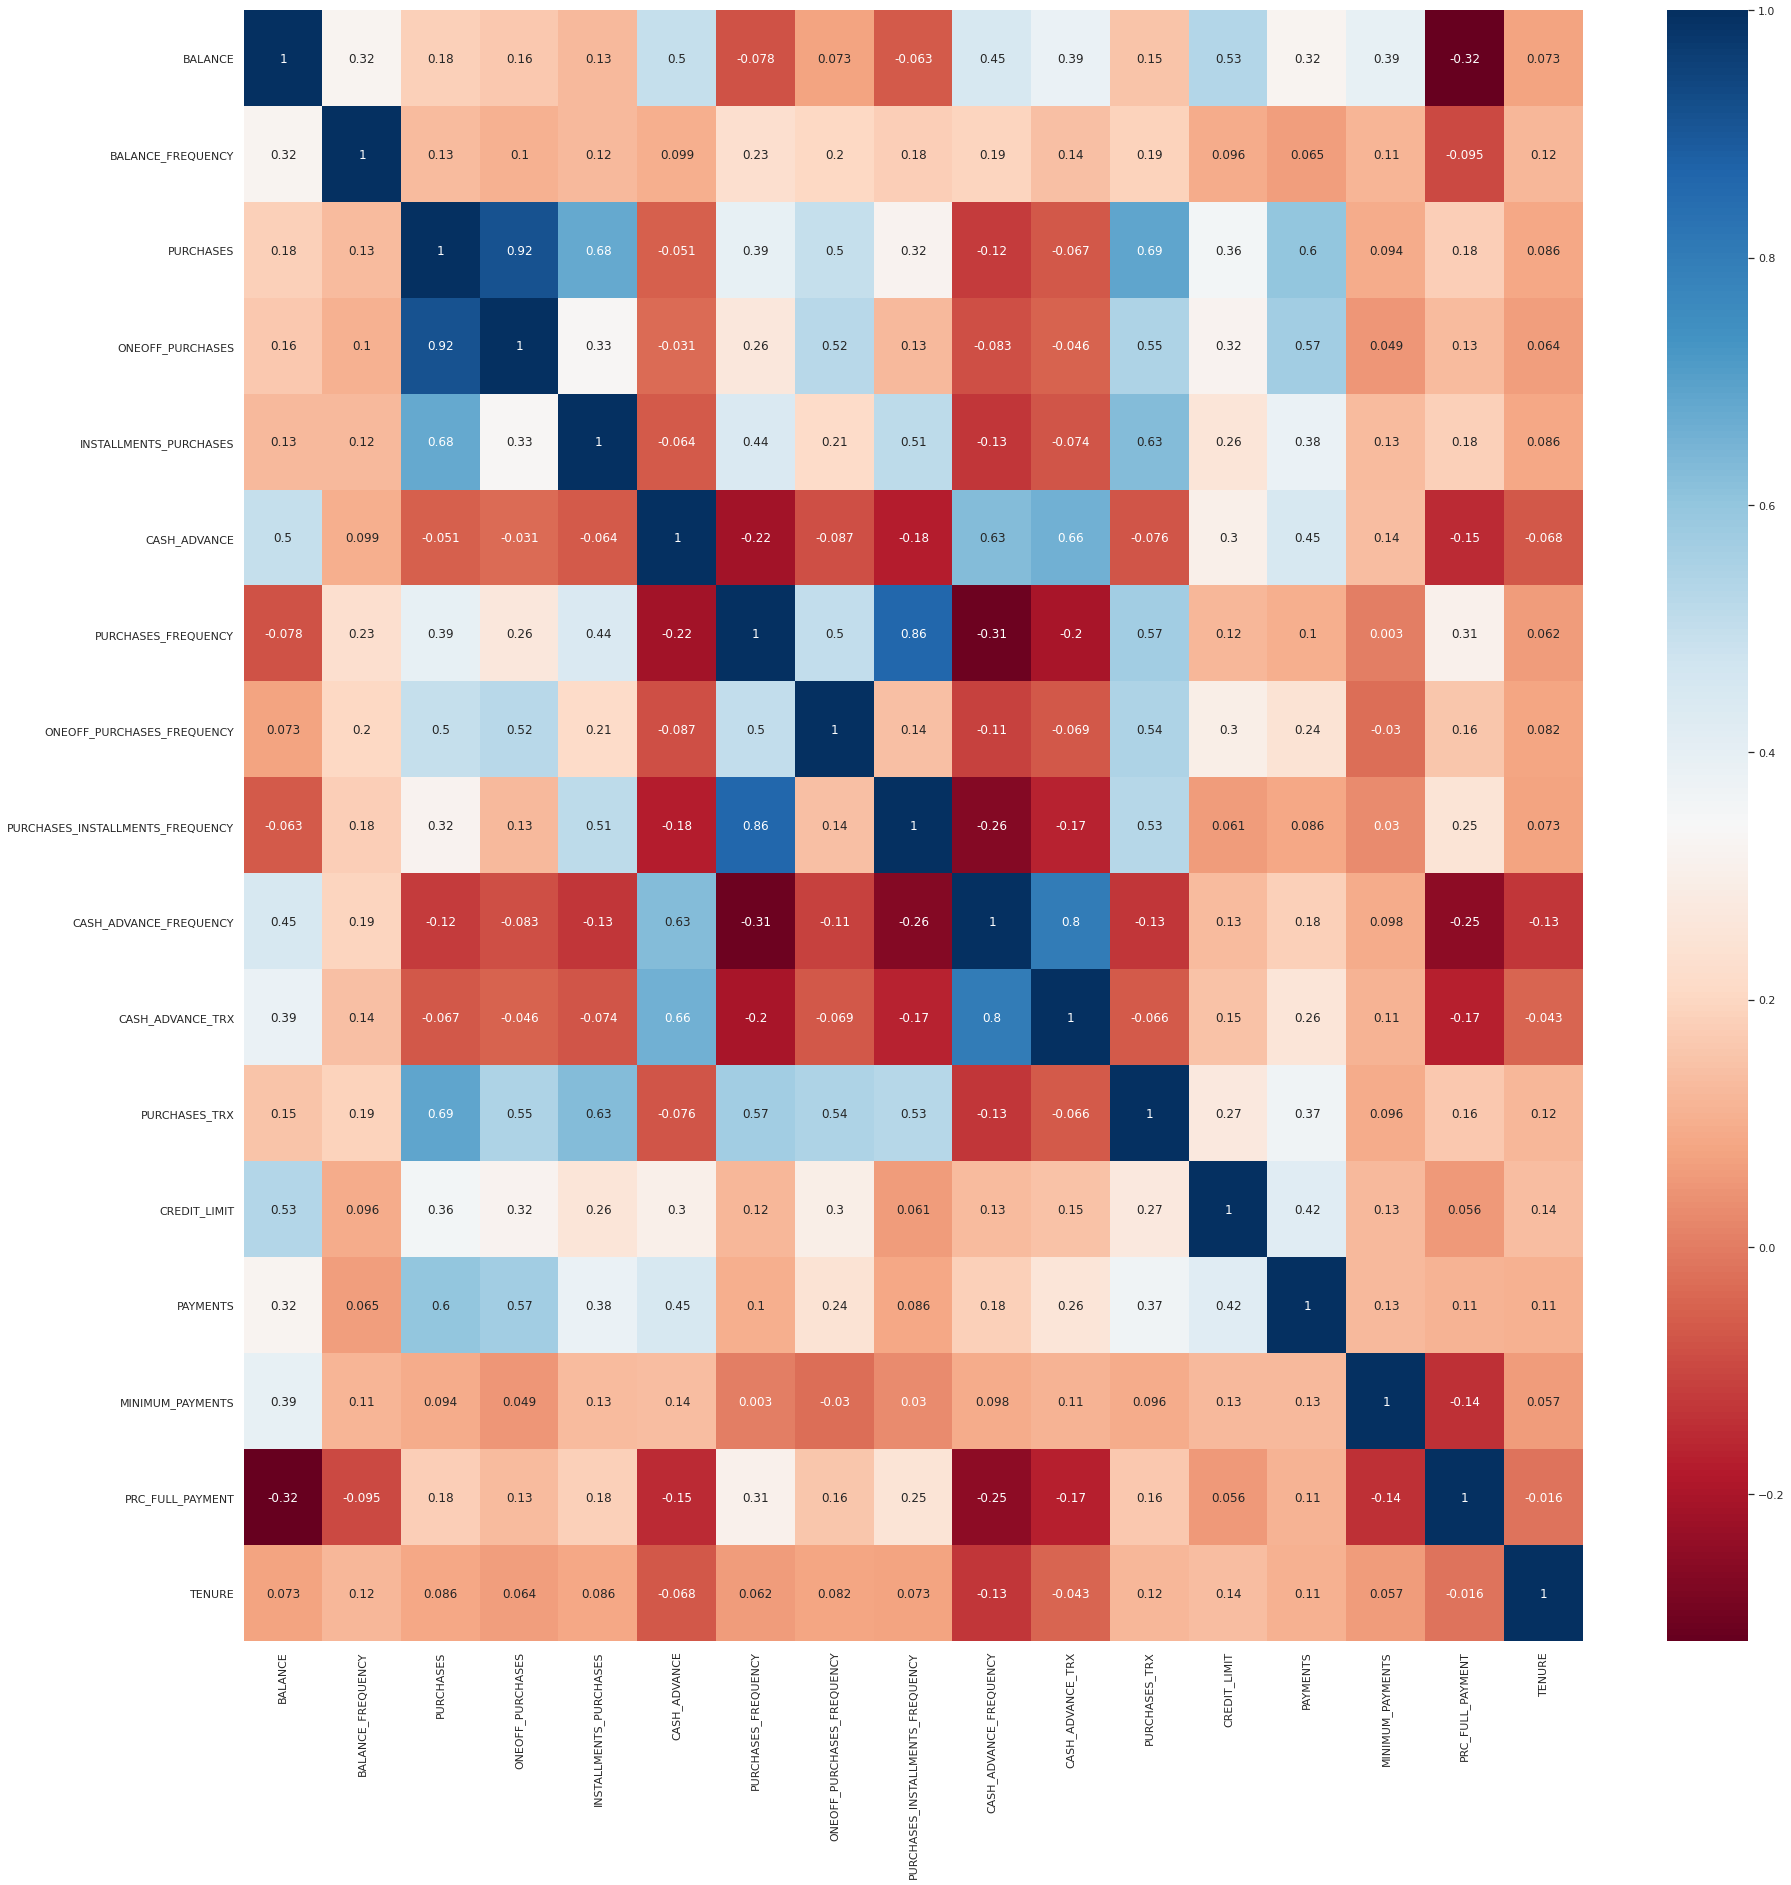

In [6]:
# Plotting correlation matrix.

correlation = prepro_df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlation, annot=True, cmap='RdBu')

Nous allons utiliser la métrique silhouette_score pour déterminer un bon compromis en les différents paramétrés de l’algorithme.

In [7]:
# Features selection.

features = ["PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS",
          "PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_TRX", "CASH_ADVANCE_FREQUENCY",
          "CASH_ADVANCE"]

model_data = prepro_df[features]

# Hierarchical clustering, unsing silhouette score.
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

siliuette_list_hierarchical = []

for cluster in range(2,12):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(model_data)
        sil_score = metrics.silhouette_score(model_data, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.899246,average,2
2,2,0.880416,complete,2
5,3,0.879960,complete,3
4,3,0.870883,average,3
7,4,0.868312,average,4
10,5,0.848782,average,5
13,6,0.780256,average,6
16,7,0.780170,average,7
19,8,0.759083,average,8
22,9,0.758909,average,9


Un partitionnement de 4 clusters avec un score de ~0.86 et la méthode average est un bon compromis.

In [8]:
myModel_Agg = AgglomerativeClustering(linkage='average', affinity='euclidean',n_clusters=4)
clust_labels=myModel_Agg.fit_predict(model_data) 

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

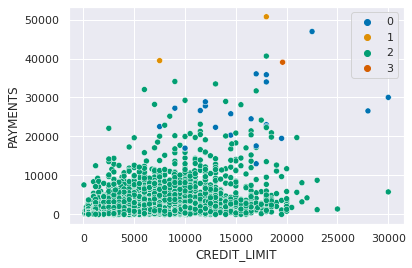

In [9]:
# Plotting clusters for CREDIT_LIMIT and PAYMENTS with herarchical clustering.
sns.scatterplot(data=prepro_df, x="CREDIT_LIMIT", y="PAYMENTS", palette="colorblind", hue=clust_labels)

/home/it/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


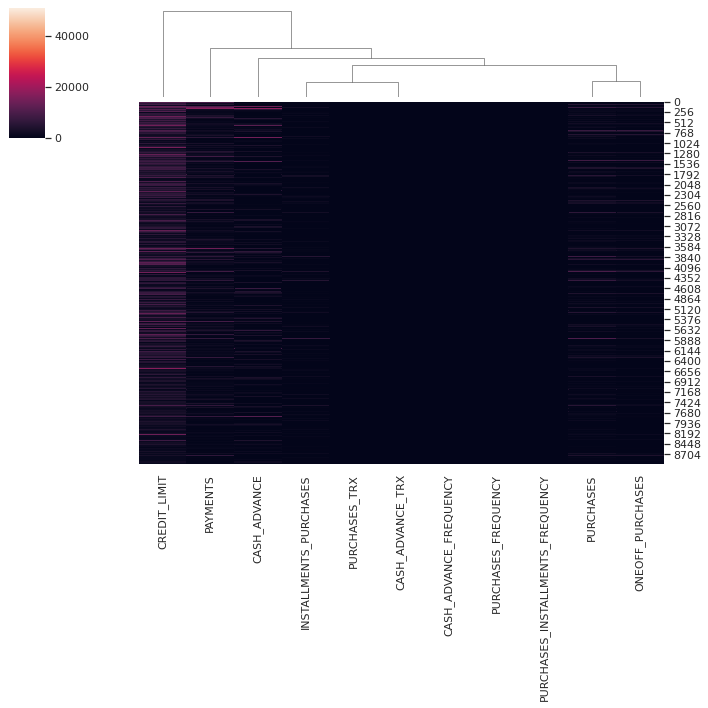

In [10]:
# Plotting Dendrogram.

sns.clustermap(model_data, row_cluster=False)

In [11]:
# KMeans clustering, unsing Elbow Method.

from sklearn.cluster import KMeans  

kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(model_data)

KMeans(n_clusters=5, random_state=42)

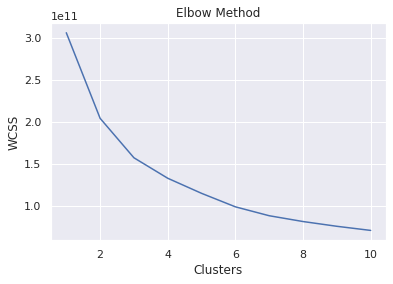

In [12]:
wcss = []
cluster_list = range(1, 11)

for i in cluster_list :
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(model_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Selon le graphe Elbow Method, notre choix se précise entre le nombre 3 et 4. Je opte pour le nombre de 4 clusters.

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(model_data)

KMeans(n_clusters=4, random_state=42)

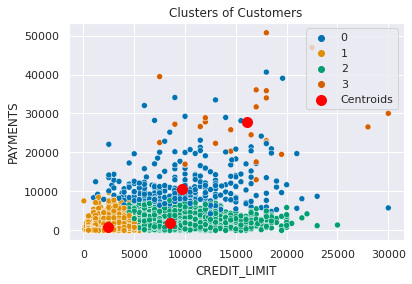

In [14]:
# Plotting clusters for CREDIT_LIMIT and PAYMENTS with KMeans clustering.

sns.scatterplot(data=prepro_df, x="CREDIT_LIMIT", y="PAYMENTS", palette="colorblind", hue=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PAYMENTS')
plt.legend()
plt.show()

In [15]:
# Comparisons between both models.

print(metrics.silhouette_score(model_data, kmeans.fit_predict(model_data), metric='euclidean'))

0.47029727567952206


D’après le silhouette score les modelé hiérarchique est plus performant que les modelé Kmeans.

In [16]:
# Davies-Bouldin score

from sklearn.metrics import davies_bouldin_score

print("Davies-Bouldin score for hierarchical clustering :", davies_bouldin_score(model_data, myModel_Agg.fit_predict(model_data)))
print("Davies-Bouldin score for k-means clustering :",davies_bouldin_score(model_data, kmeans.fit_predict(model_data)))

Davies-Bouldin score for hierarchical clustering : 0.7244524727119628
Davies-Bouldin score for k-means clustering : 1.0906628916230305
